In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

In [140]:
import os
path = os.getcwd()
base_dir = os.path.join(path, "데이터셋", "ch2025_data_items")


data_items_list = ["ch2025_mACStatus.parquet", "ch2025_mActivity.parquet", "ch2025_mAmbience.parquet",
                   "ch2025_mBle.parquet", "ch2025_mGps.parquet", "ch2025_mLight.parquet", "ch2025_mScreenStatus.parquet",
                   "ch2025_mUsageStats.parquet", "ch2025_mWifi.parquet", "ch2025_wHr.parquet", "ch2025_wLight.parquet", "ch2025_wPedo.parquet"]

paths = {name.split(" ")[0]: os.path.join(base_dir, name) for name in data_items_list}

print(paths)


train_path = os.path.join(path, "데이터셋", "ch2025_metrics_train.csv")
train_df = pd.read_csv(train_path)


Status_df = pd.read_parquet(paths["ch2025_mACStatus.parquet"])
Activity_df = pd.read_parquet(paths["ch2025_mActivity.parquet"])
Ambience_df = pd.read_parquet(paths["ch2025_mAmbience.parquet"])
Ble_df = pd.read_parquet(paths["ch2025_mBle.parquet"])
Gps_df = pd.read_parquet(paths["ch2025_mGps.parquet"])
Light_df = pd.read_parquet(paths["ch2025_mLight.parquet"])
ScreenStatus_df = pd.read_parquet(paths["ch2025_mScreenStatus.parquet"])
UsageStats_df = pd.read_parquet(paths["ch2025_mUsageStats.parquet"])
Wifi_df = pd.read_parquet(paths["ch2025_mWifi.parquet"])
wHr_df = pd.read_parquet(paths["ch2025_wHr.parquet"])
wLight_df = pd.read_parquet(paths["ch2025_wLight.parquet"])
wPedo_df = pd.read_parquet(paths["ch2025_wPedo.parquet"])

print(Status_df.head())
print(train_df.info())

{'ch2025_mACStatus.parquet': 'c:\\Users\\yunju\\OneDrive\\바탕 화면\\Repositroy\\dacon\\ETRI 휴먼이해 인공지능\\데이터셋\\ch2025_data_items\\ch2025_mACStatus.parquet', 'ch2025_mActivity.parquet': 'c:\\Users\\yunju\\OneDrive\\바탕 화면\\Repositroy\\dacon\\ETRI 휴먼이해 인공지능\\데이터셋\\ch2025_data_items\\ch2025_mActivity.parquet', 'ch2025_mAmbience.parquet': 'c:\\Users\\yunju\\OneDrive\\바탕 화면\\Repositroy\\dacon\\ETRI 휴먼이해 인공지능\\데이터셋\\ch2025_data_items\\ch2025_mAmbience.parquet', 'ch2025_mBle.parquet': 'c:\\Users\\yunju\\OneDrive\\바탕 화면\\Repositroy\\dacon\\ETRI 휴먼이해 인공지능\\데이터셋\\ch2025_data_items\\ch2025_mBle.parquet', 'ch2025_mGps.parquet': 'c:\\Users\\yunju\\OneDrive\\바탕 화면\\Repositroy\\dacon\\ETRI 휴먼이해 인공지능\\데이터셋\\ch2025_data_items\\ch2025_mGps.parquet', 'ch2025_mLight.parquet': 'c:\\Users\\yunju\\OneDrive\\바탕 화면\\Repositroy\\dacon\\ETRI 휴먼이해 인공지능\\데이터셋\\ch2025_data_items\\ch2025_mLight.parquet', 'ch2025_mScreenStatus.parquet': 'c:\\Users\\yunju\\OneDrive\\바탕 화면\\Repositroy\\dacon\\ETRI 휴먼이해 인공지능\\데이터셋\\ch2025_dat

In [141]:
all_data = [Status_df, Activity_df, Ambience_df, Ble_df, Gps_df, Light_df, ScreenStatus_df, UsageStats_df, Wifi_df, wHr_df, wLight_df, wPedo_df]
for data in all_data:
    print(data.head(3))

  subject_id           timestamp  m_charging
0       id01 2024-06-26 12:03:00           0
1       id01 2024-06-26 12:04:00           0
2       id01 2024-06-26 12:05:00           0
  subject_id           timestamp  m_activity
0       id01 2024-06-26 12:03:00           4
1       id01 2024-06-26 12:04:00           0
2       id01 2024-06-26 12:05:00           0
  subject_id           timestamp  \
0       id01 2024-06-26 13:00:10   
1       id01 2024-06-26 13:02:10   
2       id01 2024-06-26 13:04:10   

                                          m_ambience  
0  [[Music, 0.30902618], [Vehicle, 0.081680894], ...  
1  [[Music, 0.62307084], [Vehicle, 0.021118319], ...  
2  [[Horse, 0.25209898], [Animal, 0.24263993], [C...  
  subject_id           timestamp  \
0       id01 2024-06-26 12:13:00   
1       id01 2024-06-26 12:23:00   
2       id01 2024-06-26 12:33:00   

                                               m_ble  
0  [{'address': '00:15:7C:11:80:8D', 'device_clas...  
1  [{'address': '0A:

<Axes: xlabel='subject_id', ylabel='count'>

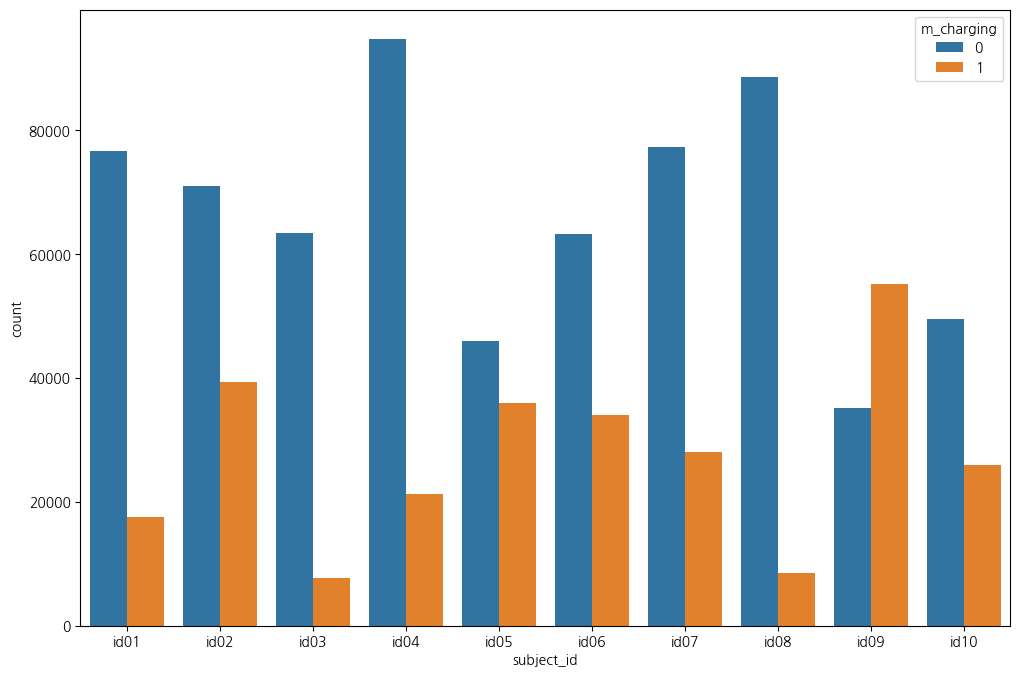

In [142]:
plt.figure(figsize = (12,8))
sns.countplot(x = "subject_id", hue = "m_charging", data = Status_df)

In [143]:
Ambience_df.head()

,subject_id,timestamp,m_ambience
0,id01,2024-06-26 13:00:10,"[[Music, 0.30902618], [Vehicle, 0.081680894], ..."
1,id01,2024-06-26 13:02:10,"[[Music, 0.62307084], [Vehicle, 0.021118319], ..."
2,id01,2024-06-26 13:04:10,"[[Horse, 0.25209898], [Animal, 0.24263993], [C..."
3,id01,2024-06-26 13:06:10,"[[Speech, 0.93433166], [Inside, large room or ..."
4,id01,2024-06-26 13:08:10,"[[Speech, 0.8935082], [Inside, small room, 0.0..."


In [144]:
def split_array_column(df, col, count):
    df = df.copy()

    for i in range(count):
        df[f"{col}_{i}"] = df[col].apply(lambda x: x[i] if isinstance(x, (list, np.ndarray)) and len(x) > i else None)

    def split_name(x):
        return " ".join(x.split(",")[0])
    
    df = pd.DataFrame(df)
    for i in range(count):
        df[f"{col}_{i}_name"] = df[f"{col}_{i}"].apply(lambda x: x[0])
        df[f"{col}_{i}_data"] = df[f"{col}_{i}"].apply(lambda x: x[1])

    for i in range(count):
        df = df.drop([f"{col}_{i}"], axis = 1)
    
    df = df.drop("m_ambience", axis = 1)


    return df


ambience = split_array_column(Ambience_df, "m_ambience", 10)
ambience.head()

,subject_id,timestamp,m_ambience_0_name,m_ambience_0_data,m_ambience_1_name,m_ambience_1_data,m_ambience_2_name,m_ambience_2_data,m_ambience_3_name,m_ambience_3_data,...,m_ambience_5_name,m_ambience_5_data,m_ambience_6_name,m_ambience_6_data,m_ambience_7_name,m_ambience_7_data,m_ambience_8_name,m_ambience_8_data,m_ambience_9_name,m_ambience_9_data
0,id01,2024-06-26 13:00:10,Music,0.30902618,Vehicle,0.081680894,Motor vehicle (road),0.04035286,"Outside, urban or manmade",0.037144363,...,Car,0.03199804,Speech,0.029806137,"Inside, large room or hall",0.01684492,Truck,0.016206821,Sound effect,0.01591479
1,id01,2024-06-26 13:02:10,Music,0.62307084,Vehicle,0.021118319,Bell,0.018510727,Hiss,0.013137147,...,Chime,0.012369333,Car,0.011385,Motor vehicle (road),0.0107314605,Bicycle,0.010630278,"Chink, clink",0.010412726
2,id01,2024-06-26 13:04:10,Horse,0.25209898,Animal,0.24263993,Clip-clop,0.24169719,"Outside, rural or natural",0.20218423,...,Rustling leaves,0.09363359,Wind,0.07172977,Wild animals,0.06615251,Snake,0.0627117,Bicycle,0.05555296
3,id01,2024-06-26 13:06:10,Speech,0.93433166,"Inside, large room or hall",0.041821606,"Narration, monologue",0.015862875,"Inside, public space",0.0069918185,...,Music,0.0014499724,Door,0.0013527935,Crowd,0.0010621995,Clip-clop,8.6553075E-4,Tap,8.336997E-4
4,id01,2024-06-26 13:08:10,Speech,0.8935082,"Inside, small room",0.019385122,"Inside, large room or hall",0.01352074,Conversation,0.0076918676,...,"Outside, rural or natural",0.005461581,"Narration, monologue",0.0052098036,"Inside, public space",0.003650546,Animal,0.0031810105,"Child speech, kid speaking",0.002692297


In [145]:
categories = {
    '기계/교통': ['Train', 'Bicycle', 'Motor vehicle (road)', 'Bus', 'Truck', 'Car', 'Motorcycle', 'Vehicle', 'Boat, Water vehicle', 
                  'Rowboat, canoe, kayak', 'Air brake', 'Engine', 'Fixed-wing aircraft, airplane', 'Jet engine', 'Motorboat, speedboat', 
                  'Helicopter', 'Aircraft', 'Train horn', 'Race car, auto racing', 'Accelerating, revving, vroom', 'Train whistle', 
                  'Power tool', 'Car passing by', 'Emergency vehicle', 'Fire engine, fire truck (siren)', 'Police car (siren)', 
                  'Ambulance (siren)', 'Fire alarm', 'Siren', 'Engine starting', 'Reversing beeps', 'Skidding', 'Train wheels squealing', 
                  'Tire squeal', 'Honk', 'Traffic noise, roadway noise', 'Rain on surface', 'Rain, thunderstorm'],
    '자연/동물': ['Wild animals', 'Bird', 'Snake', 'Waterfall', 'Rustling leaves', 'Dog', 'Cat', 'Horse', 'Rodents, rats, mice', 'Frog', 
                 'Bird flight, flapping wings', 'Insect', 'Bee, wasp, etc.', 'Pigeon, dove', 'Goose', 'Turkey', 'Cattle, bovinae', 'Crow', 
                 'Meow', 'Barking', 'Fish', 'Duck', 'Mosquito', 'Horse', 'Gasp', 'Growling', 'Squeal', 'Whispering', 'Screeching'],
    '음악/소리': ['Chime', 'Music', 'New-age music', 'Jingle (music)', 'Classical music', 'Singing', 'Rock and roll', 'Pop music', 
                 'Dance music', 'Jazz', 'Blues', 'Rock music', 'Electronic music', 'Acoustic guitar', 'Electric guitar', 'Bass guitar', 
                 'Percussion', 'Drum kit', 'Drum', 'Sitar', 'Mandolin', 'Tuning fork', 'Guitar', 'Funk', 'Ska', 'Swing music', 'Cello', 
                 'Flute', 'Violin', 'Opera', 'Gospel music', 'Country', 'Rapping', 'Reggae', 'Afrobeat', 'Tabla', 'Belly laugh', 'Piano'],
    '효과/소리': ['Explosion', 'Firecracker', 'Smash, crash', 'Bang', 'Crash', 'Screaming', 'Explosion', 'Burst, pop', 'Whimper', 
                'Whistle', 'Clatter', 'Clapping', 'Cough', 'Knock', 'Click', 'Frying (food)', 'Cap gun', 'Boom', 'Tick-tock', 'Thump, thud', 
                'Chime', 'Barking', 'Beep', 'Humming', 'Creaking', 'Fart', 'Splinter', 'Squish', 'Ding-dong', 'Squeak', 'Honk', 'Creak', 
                'Sanding', 'Chop', 'Shattering'],
    '음성/대화': ['Speech', 'Narration, monologue', 'Speech synthesizer', 'Conversation', 'Shout', 'Whispering', 'Yell', 'Chatter', 'Dialogue'],
    '기타': ['Silence', 'Noise', 'Whispering', 'Environmental noise', 'Mains hum', 'Radio', 'White noise', 'TV', 'Microwave oven', 
            'Electric shaver', 'Power windows', 'Steam', 'Harmonics', 'Clap', 'Grunt', 'Hum', 'Soundtrack music']
} 

def map_to_category(sound):
    for category, sounds in categories.items():
        if sound in sounds:
            return category
    return '기타'

for i in range(10):
    column_name = f"categorical_{i}"
    ambience[column_name] = ambience[f"m_ambience_{i}_name"].apply(map_to_category)

ambience.head(20)

,subject_id,timestamp,m_ambience_0_name,m_ambience_0_data,m_ambience_1_name,m_ambience_1_data,m_ambience_2_name,m_ambience_2_data,m_ambience_3_name,m_ambience_3_data,...,categorical_0,categorical_1,categorical_2,categorical_3,categorical_4,categorical_5,categorical_6,categorical_7,categorical_8,categorical_9
0,id01,2024-06-26 13:00:10,Music,0.30902618,Vehicle,0.081680894,Motor vehicle (road),0.04035286,"Outside, urban or manmade",0.037144363,...,음악/소리,기계/교통,기계/교통,기타,기타,기계/교통,음성/대화,기타,기계/교통,기타
1,id01,2024-06-26 13:02:10,Music,0.62307084,Vehicle,0.021118319,Bell,0.018510727,Hiss,0.013137147,...,음악/소리,기계/교통,기타,기타,기타,음악/소리,기계/교통,기계/교통,기계/교통,기타
2,id01,2024-06-26 13:04:10,Horse,0.25209898,Animal,0.24263993,Clip-clop,0.24169719,"Outside, rural or natural",0.20218423,...,자연/동물,기타,기타,기타,기타,자연/동물,기타,자연/동물,자연/동물,기계/교통
3,id01,2024-06-26 13:06:10,Speech,0.93433166,"Inside, large room or hall",0.041821606,"Narration, monologue",0.015862875,"Inside, public space",0.0069918185,...,음성/대화,기타,음성/대화,기타,음성/대화,음악/소리,기타,기타,기타,기타
4,id01,2024-06-26 13:08:10,Speech,0.8935082,"Inside, small room",0.019385122,"Inside, large room or hall",0.01352074,Conversation,0.0076918676,...,음성/대화,기타,기타,음성/대화,기타,기타,음성/대화,기타,기타,기타
5,id01,2024-06-26 13:10:10,Speech,0.79542226,"Inside, large room or hall",0.049179025,"Inside, public space",0.005481243,"Narration, monologue",0.004768856,...,음성/대화,기타,기타,음성/대화,기타,기타,기타,기타,기타,기타
6,id01,2024-06-26 13:12:10,Speech,0.8184474,Buzz,0.027313255,"Inside, public space",0.017776482,"Inside, large room or hall",0.016867302,...,음성/대화,기타,기타,기타,기타,자연/동물,자연/동물,기타,기타,기타
7,id01,2024-06-26 13:14:10,Speech,0.80110717,"Inside, large room or hall",0.015226506,"Inside, small room",0.013447352,"Domestic animals, pets",0.009014404,...,음성/대화,기타,기타,기타,자연/동물,음성/대화,기타,음성/대화,기타,기타
8,id01,2024-06-26 13:16:10,Speech,0.50018805,"Domestic animals, pets",0.05621013,Breathing,0.04530055,"Inside, small room",0.035082698,...,음성/대화,기타,기타,기타,기타,자연/동물,기타,자연/동물,기타,기타
9,id01,2024-06-26 13:18:10,Speech,0.9326062,"Inside, large room or hall",0.03695555,"Inside, public space",0.015402272,"Narration, monologue",0.0073751584,...,음성/대화,기타,기타,음성/대화,기타,기타,기타,기계/교통,기계/교통,기계/교통


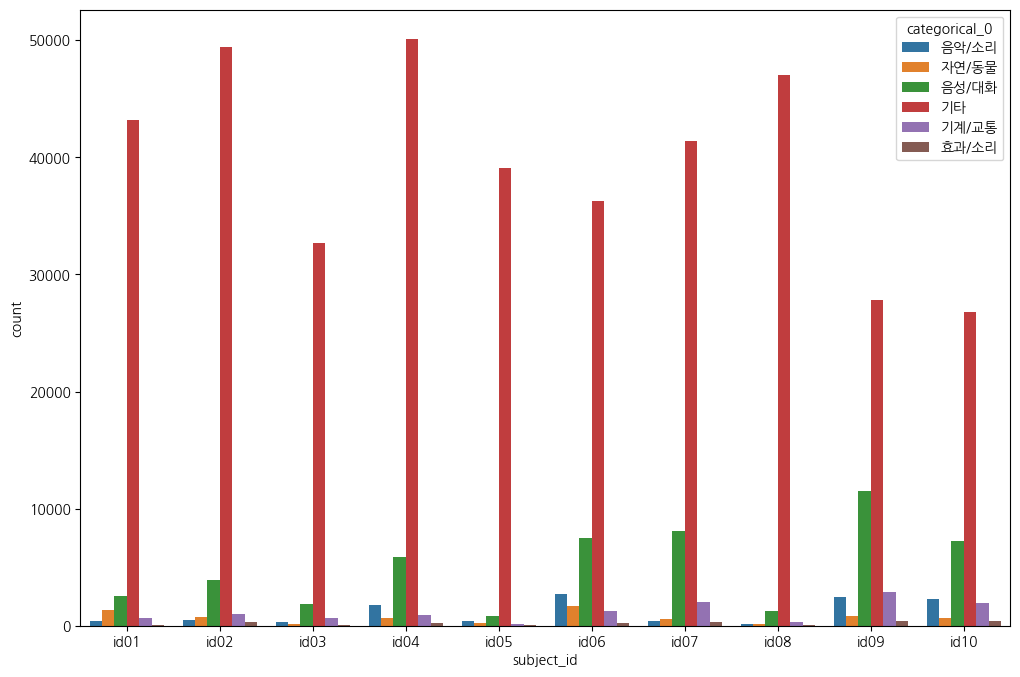

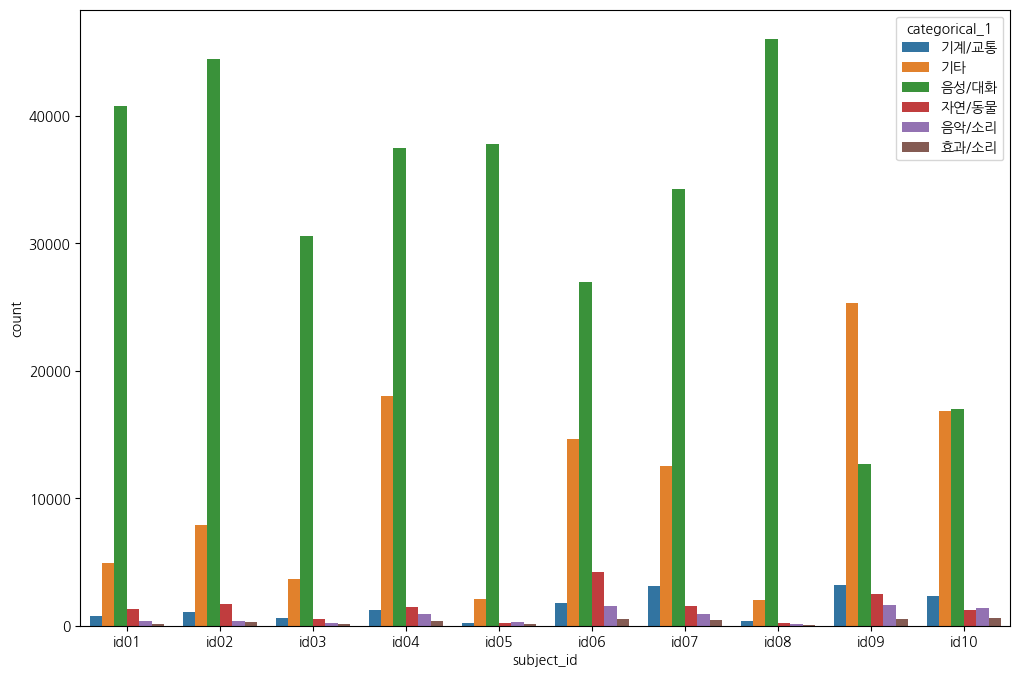

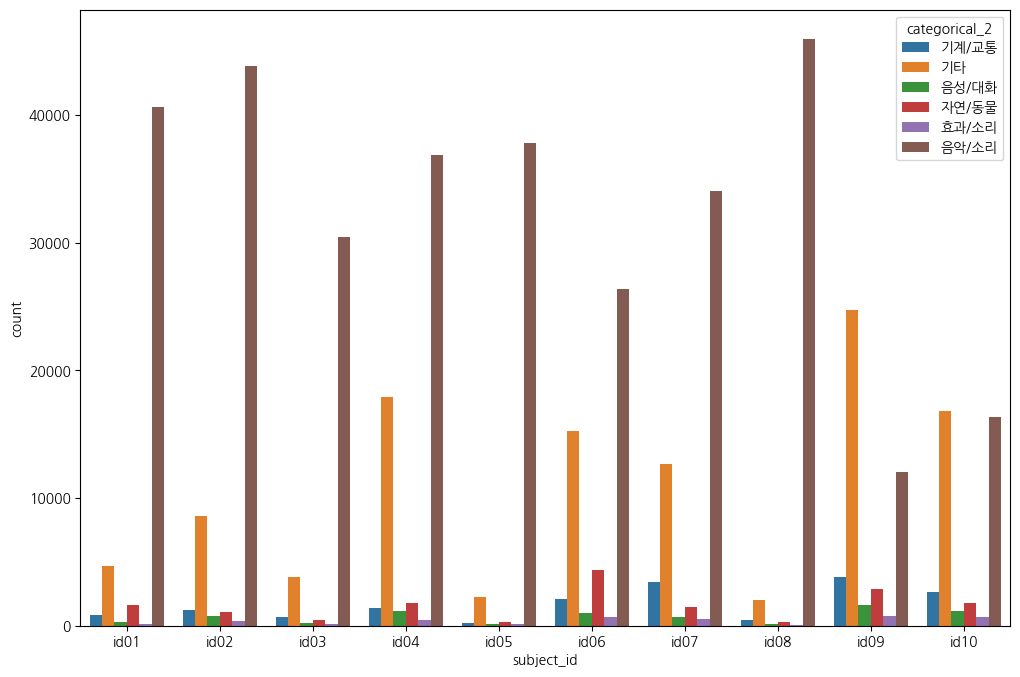

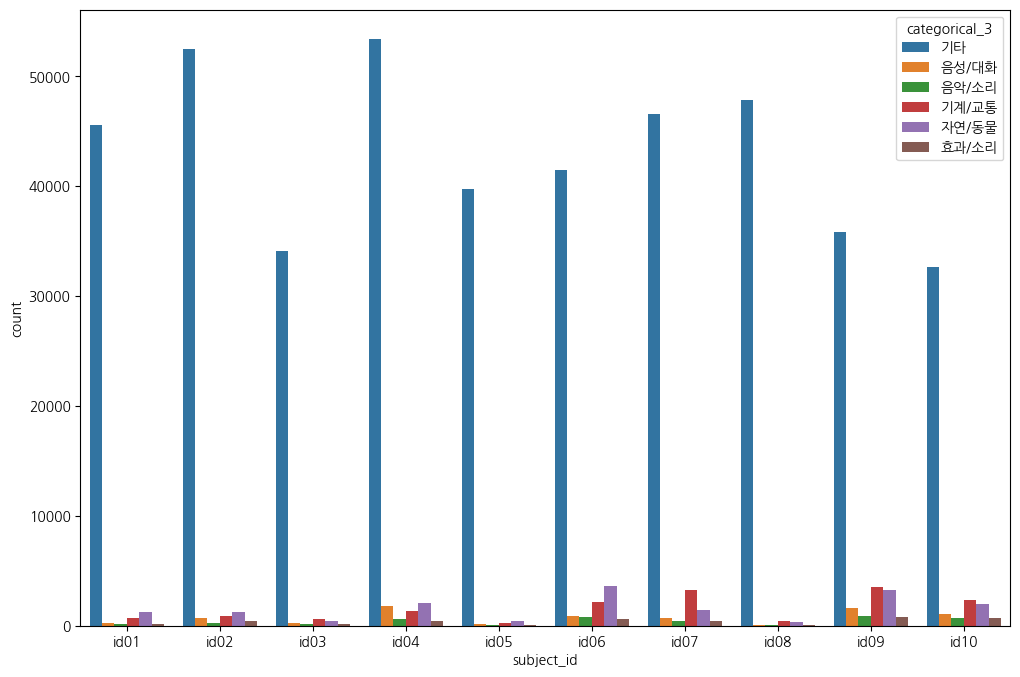

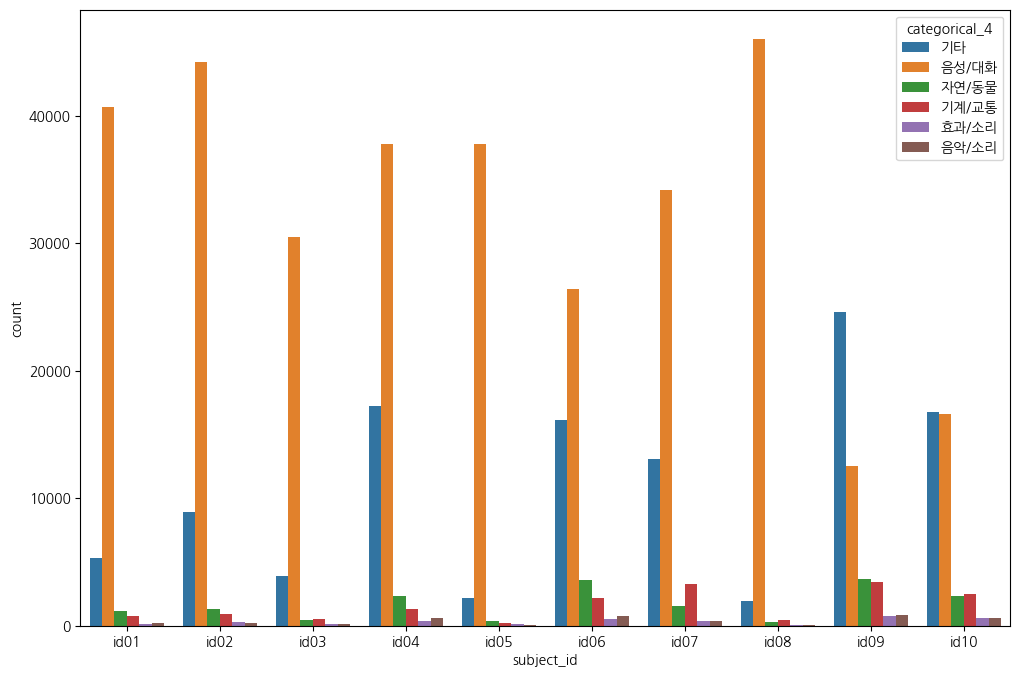

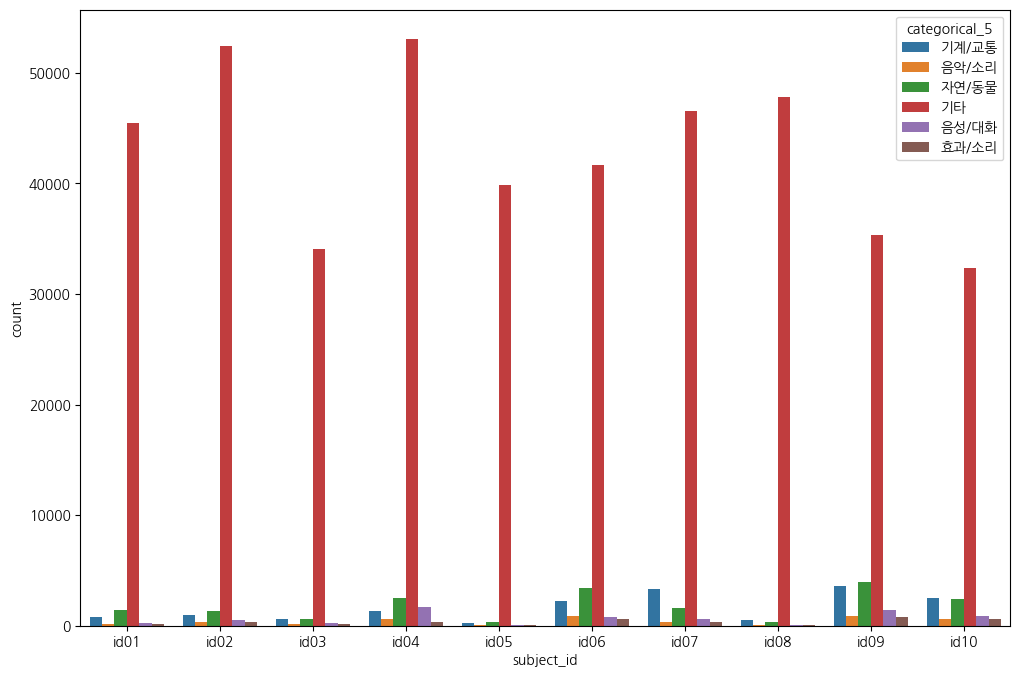

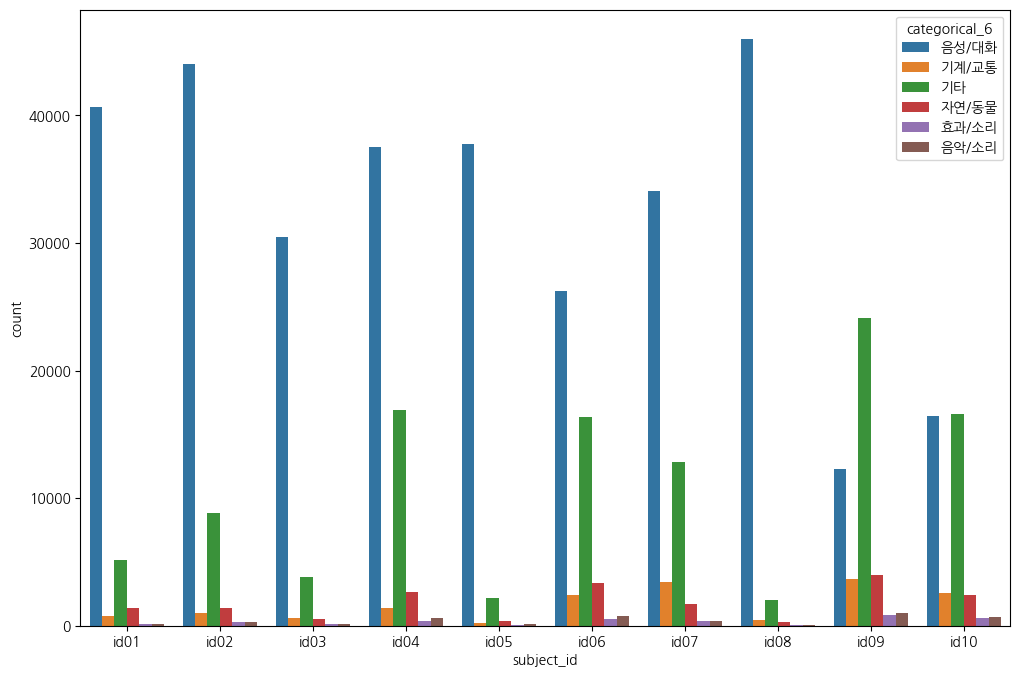

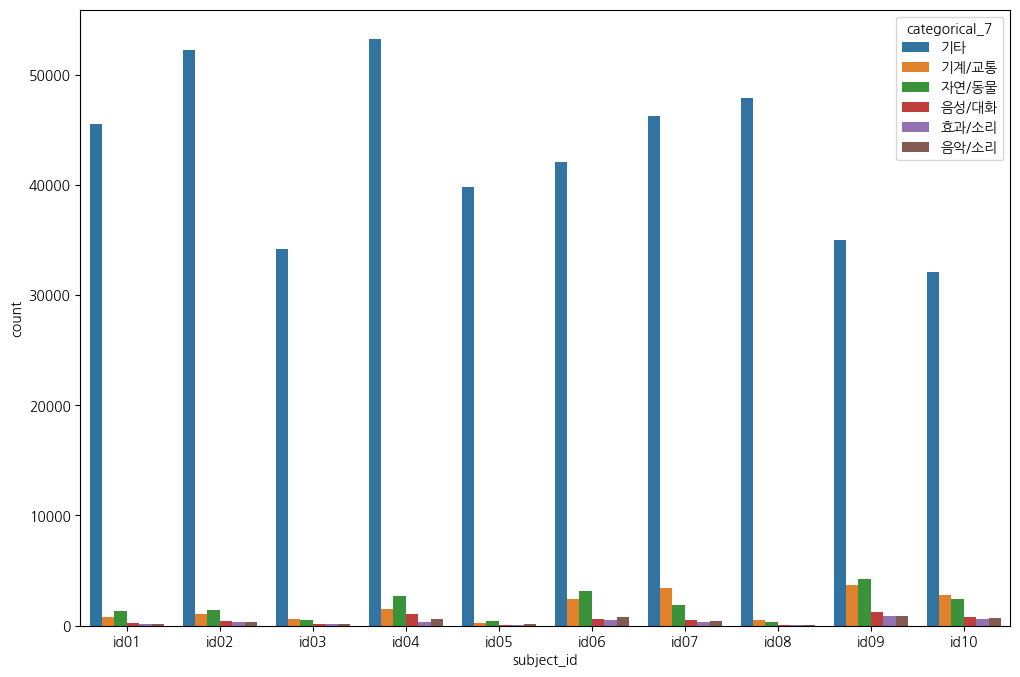

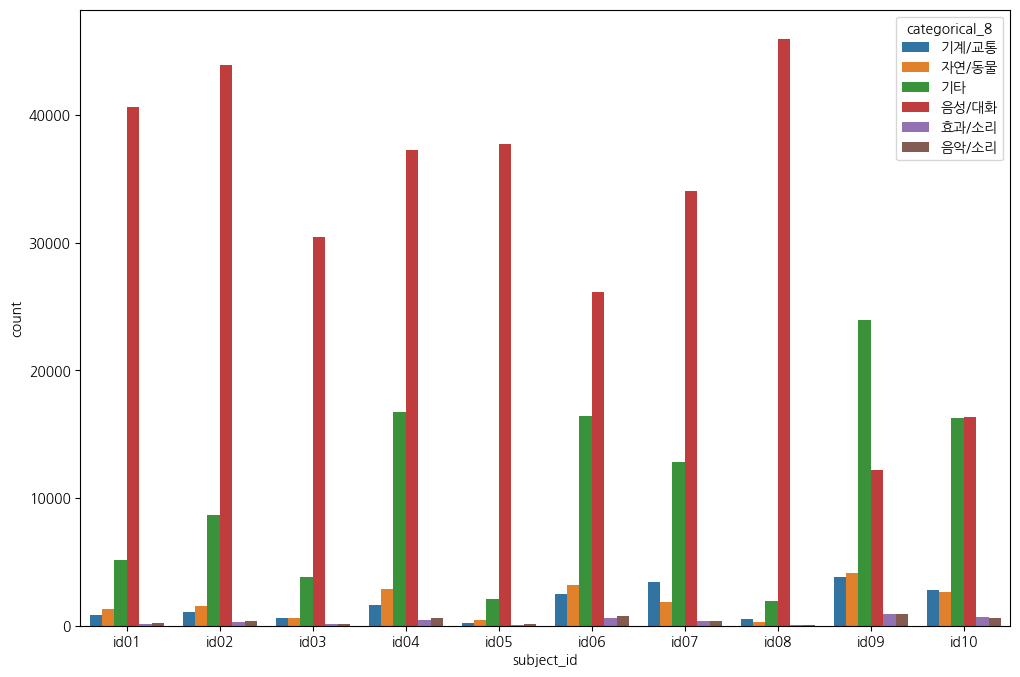

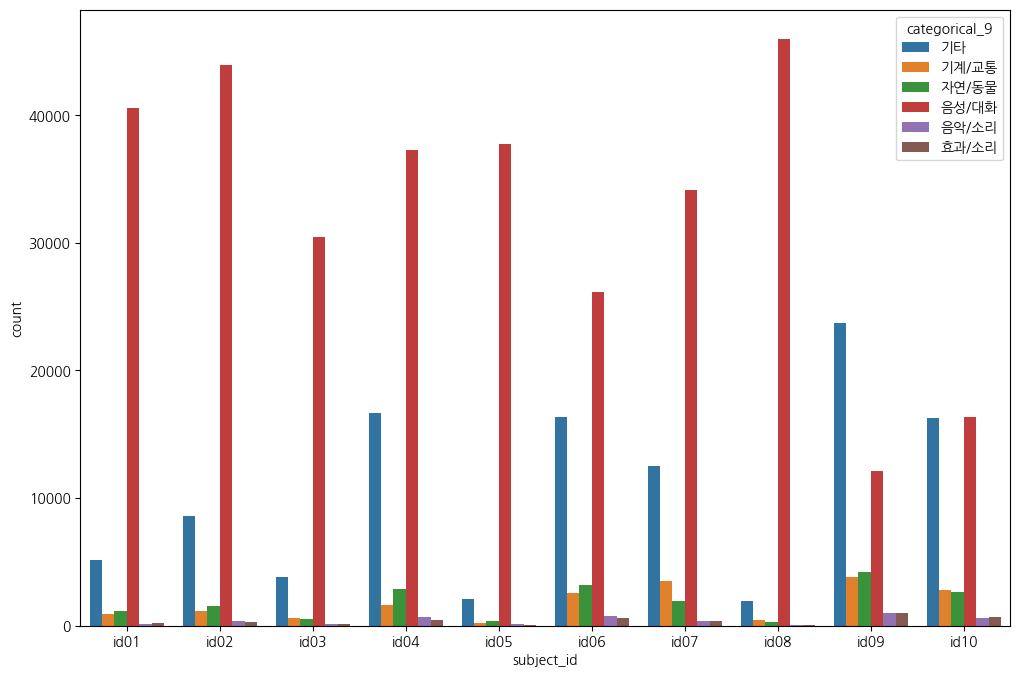

In [146]:
plt.rc("font", family = "NanumGothic")
for i in range(10):
    plt.figure(figsize = (12,8))
    sns.countplot(x = "subject_id", hue = f"categorical_{i}", data = ambience)
    plt.show()

In [147]:
ambience.columns

Index(['subject_id', 'timestamp', 'm_ambience_0_name', 'm_ambience_0_data',
       'm_ambience_1_name', 'm_ambience_1_data', 'm_ambience_2_name',
       'm_ambience_2_data', 'm_ambience_3_name', 'm_ambience_3_data',
       'm_ambience_4_name', 'm_ambience_4_data', 'm_ambience_5_name',
       'm_ambience_5_data', 'm_ambience_6_name', 'm_ambience_6_data',
       'm_ambience_7_name', 'm_ambience_7_data', 'm_ambience_8_name',
       'm_ambience_8_data', 'm_ambience_9_name', 'm_ambience_9_data',
       'categorical_0', 'categorical_1', 'categorical_2', 'categorical_3',
       'categorical_4', 'categorical_5', 'categorical_6', 'categorical_7',
       'categorical_8', 'categorical_9'],
      dtype='object')

In [ ]:
def preprocess(df, col):
    df = df.copy()
 

    df["timestamp"] = pd.to_datetime(df["timestamp"])
    df = df.set_index("timestamp")
    df = df.sort_index()

    rolling_result_1h = df.groupby("subject_id")[col].rolling(window= "1H").mean()
    rolling_result_1d = df.groupby("subject_id")[col].rolling(window = "1D").mean()

    rolling_result_1h.name = f"{col}_r-m_1H"
    rolling_result_1d.name = f"{col}_r-m_1D"
        
    rolling_result_1h = rolling_result_1h.reset_index()
    rolling_result_1d = rolling_result_1d.reset_index()


    df = df.reset_index()
    df = df.merge(rolling_result_1h, on = ["subject_id", "timestamp"], how = "left")
    df = df.merge(rolling_result_1d, on = ["subject_id", "timestamp"], how = "left")

    return df


Status = preprocess(Status_df, "m_charging")
Activity = preprocess(Activity_df, "m_activity")
Ambience = preprocess(ambience, data)


C:\Users\yunju\AppData\Local\Temp\ipykernel_41556\2442040103.py:12: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  rolling_result_1h = df.groupby("subject_id")[col].rolling(window= "1H").mean()
C:\Users\yunju\AppData\Local\Temp\ipykernel_41556\2442040103.py:12: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  rolling_result_1h = df.groupby("subject_id")[col].rolling(window= "1H").mean()
C:\Users\yunju\AppData\Local\Temp\ipykernel_41556\2442040103.py:12: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  rolling_result_1h = df.groupby("subject_id")[col].rolling(window= "1H").mean()


In [161]:
Ambience.columns

Index(['timestamp', 'subject_id', 'm_ambience_0_name', 'm_ambience_0_data',
       'm_ambience_1_name', 'm_ambience_1_data_x', 'm_ambience_2_name',
       'm_ambience_2_data_x', 'm_ambience_3_name', 'm_ambience_3_data_x',
       'm_ambience_4_name', 'm_ambience_4_data_x', 'm_ambience_5_name',
       'm_ambience_5_data_x', 'm_ambience_6_name', 'm_ambience_6_data_x',
       'm_ambience_7_name', 'm_ambience_7_data_x', 'm_ambience_8_name',
       'm_ambience_8_data_x', 'm_ambience_9_name', 'm_ambience_9_data_x',
       'categorical_0', 'categorical_1', 'categorical_2', 'categorical_3',
       'categorical_4', 'categorical_5', 'categorical_6', 'categorical_7',
       'categorical_8', 'categorical_9', 'm_ambience_1_data_y',
       'm_ambience_2_data_y', 'm_ambience_3_data_y', 'm_ambience_4_data_y',
       'm_ambience_5_data_y', 'm_ambience_6_data_y', 'm_ambience_7_data_y',
       'm_ambience_8_data_y', 'm_ambience_9_data_y', 'm_ambience_1_data',
       'm_ambience_2_data', 'm_ambience_3_data

In [150]:
Status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939896 entries, 0 to 939895
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   timestamp   939896 non-null  datetime64[ns]
 1   subject_id  939896 non-null  object        
 2   m_charging  939896 non-null  int64         
 3   g_r-m_1H    939896 non-null  float64       
 4   g_r-m_1D    939896 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 35.9+ MB


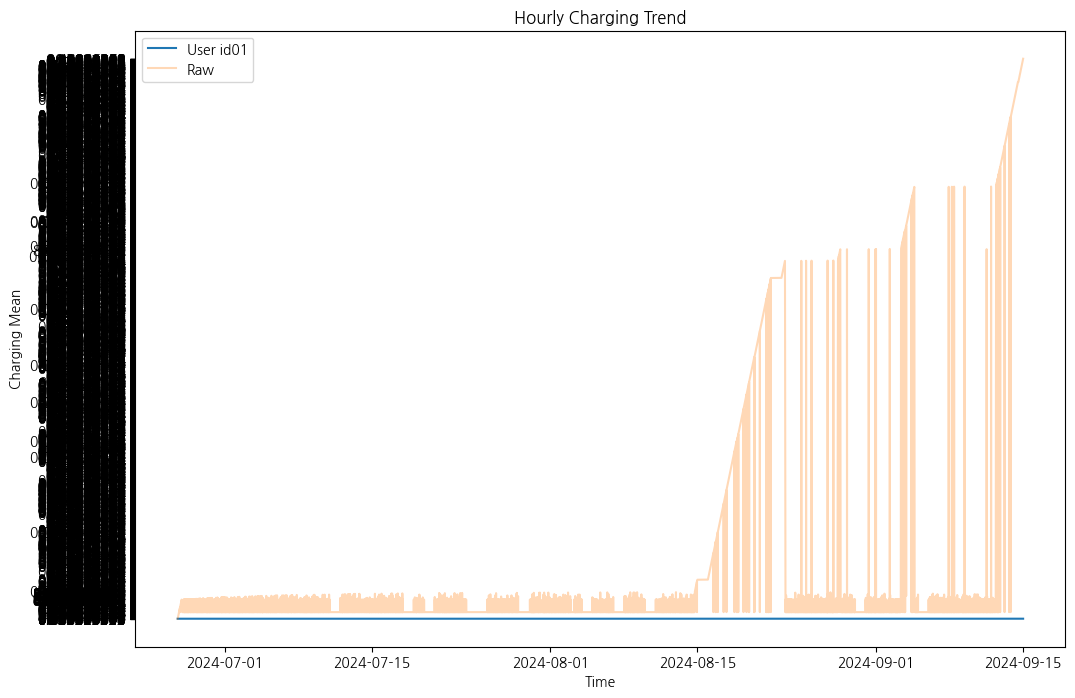

KeyboardInterrupt: 

In [162]:
for sid, group in Ambience.groupby("subject_id"):
    plt.figure(figsize = (12,8))
    plt.plot(group["timestamp"], group['m_ambience_1_data_y'], label=f"User {sid}")
    plt.plot(group["timestamp"], group['m_ambience_1_data_x'], alpha = 0.3, label = "Raw")
    plt.xlabel("Time")
    plt.ylabel("Charging Mean")
    plt.title("Hourly Charging Trend")
    plt.legend()
    plt.show()

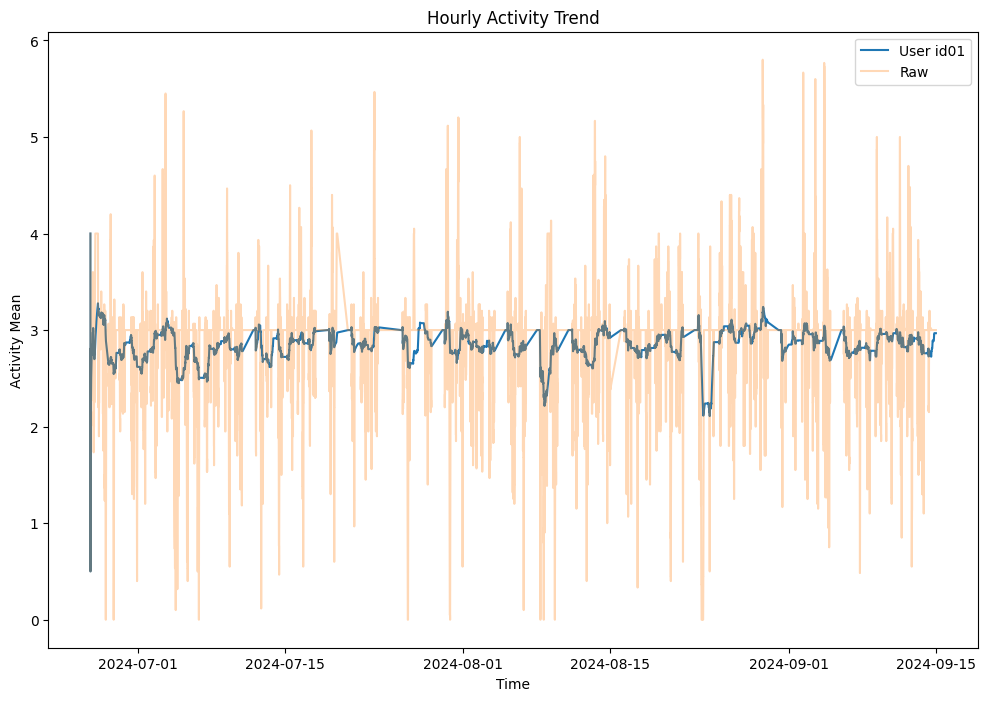

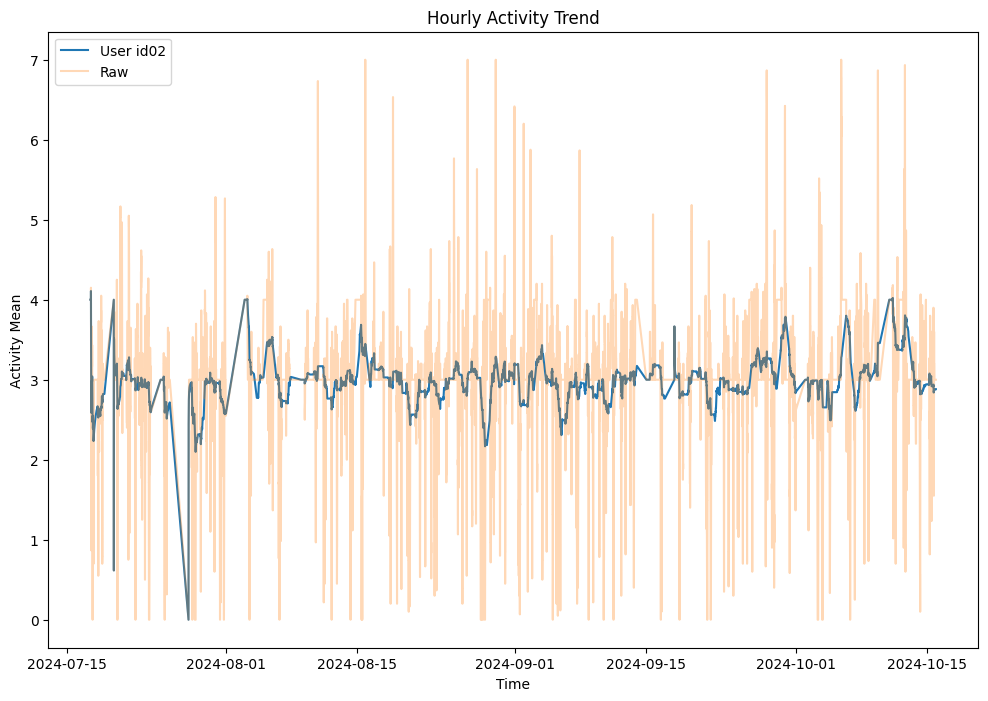

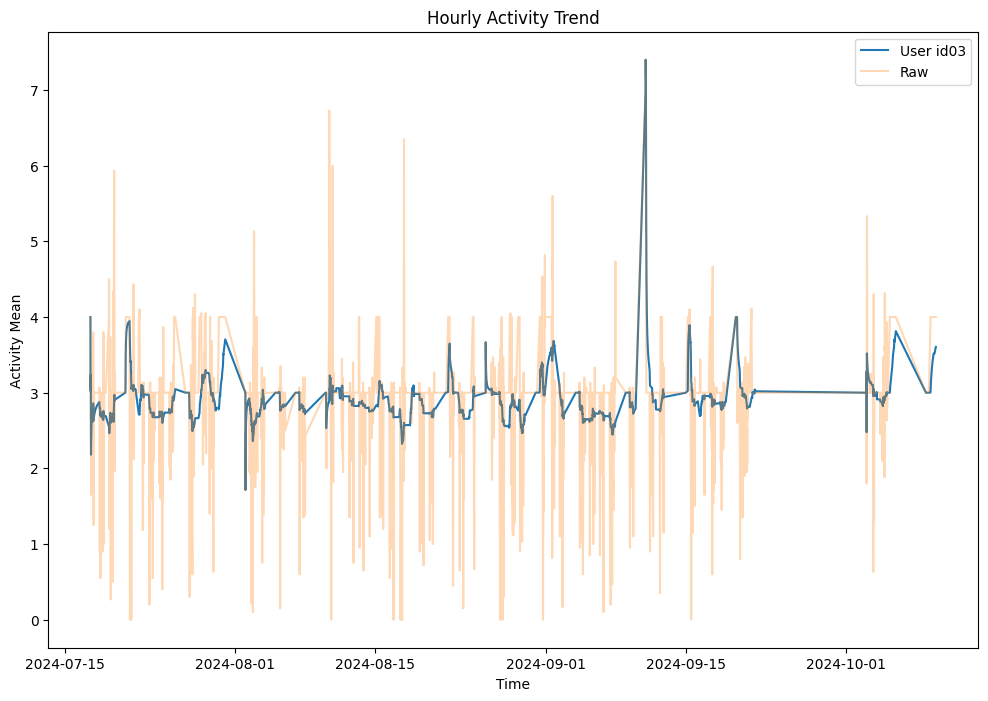

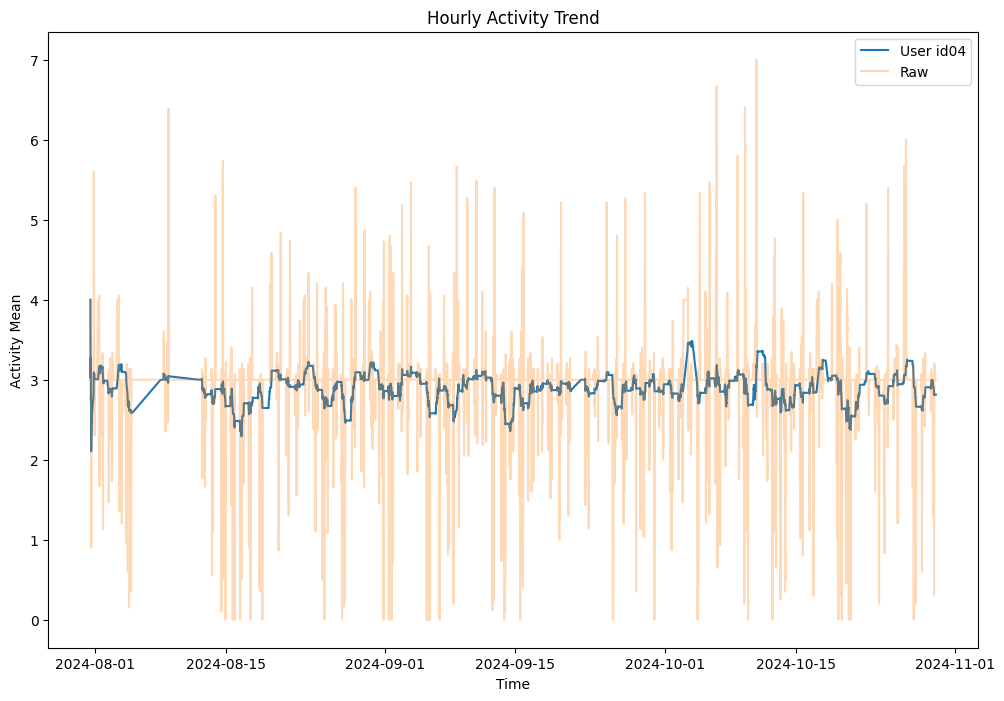

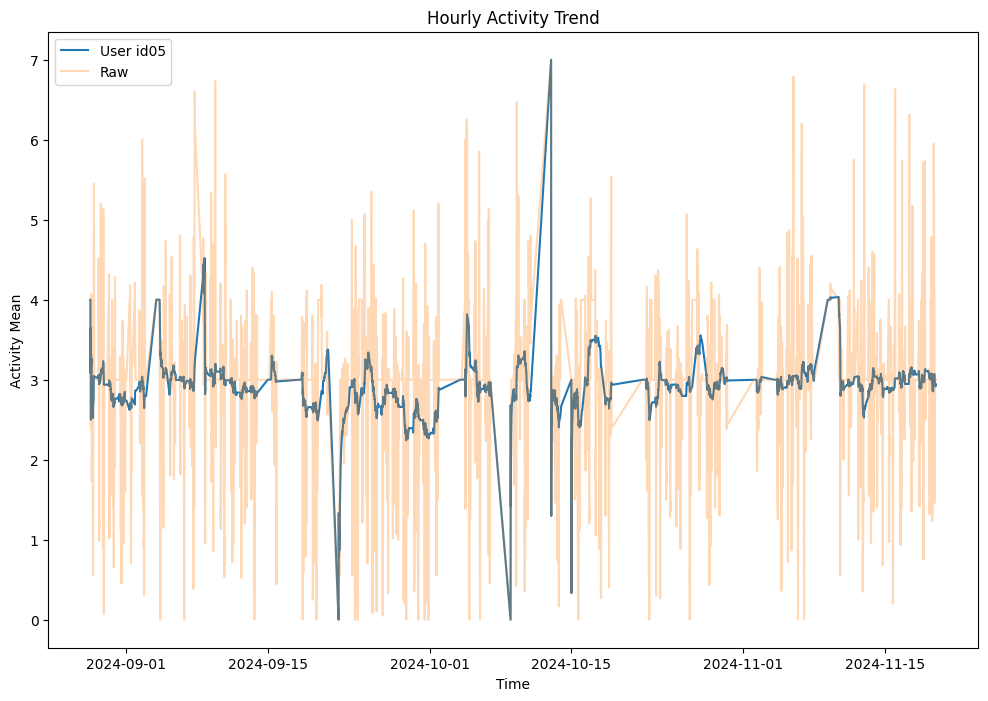

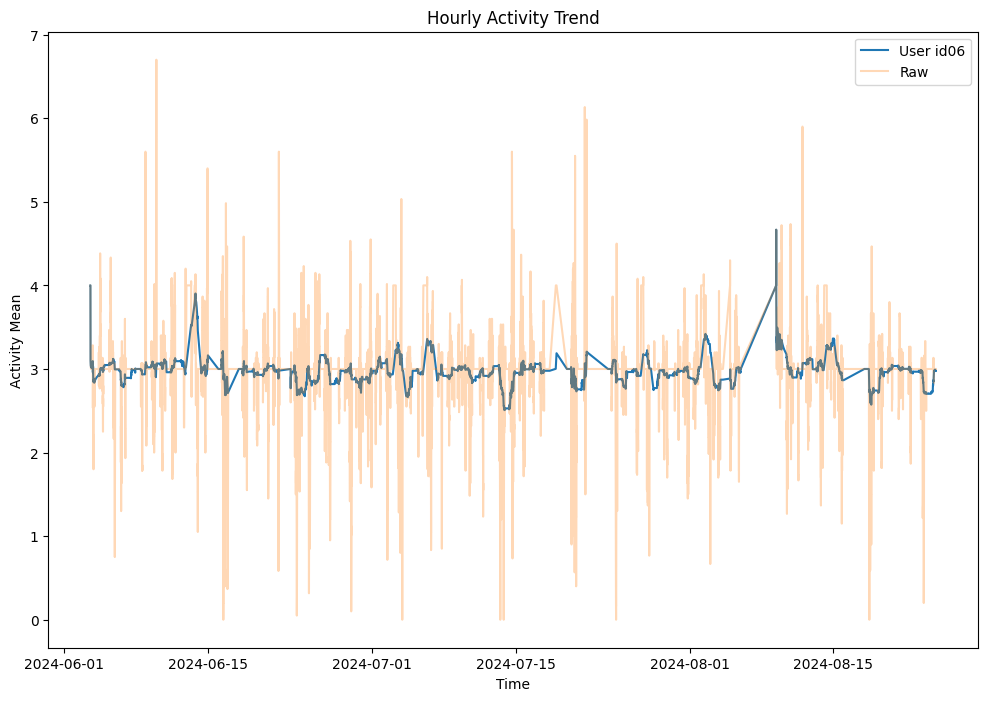

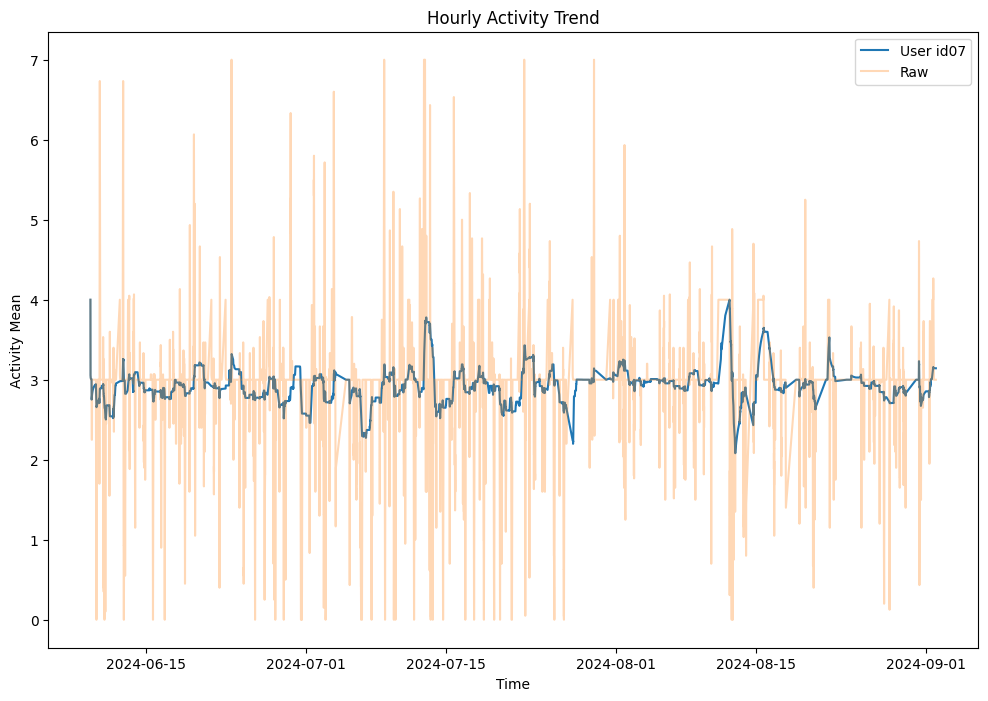

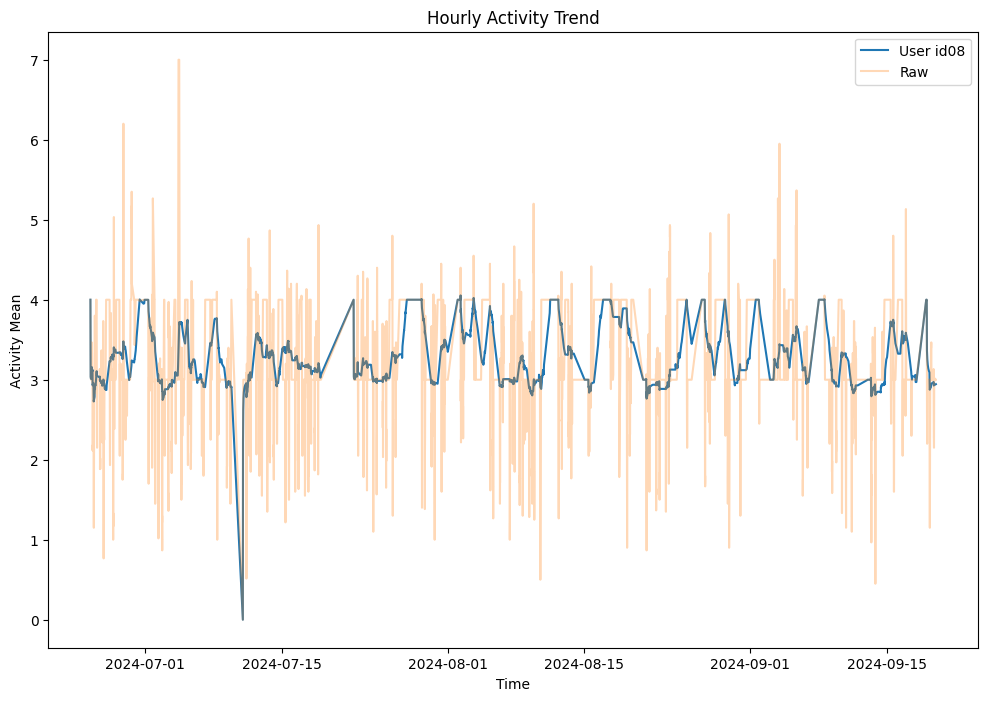

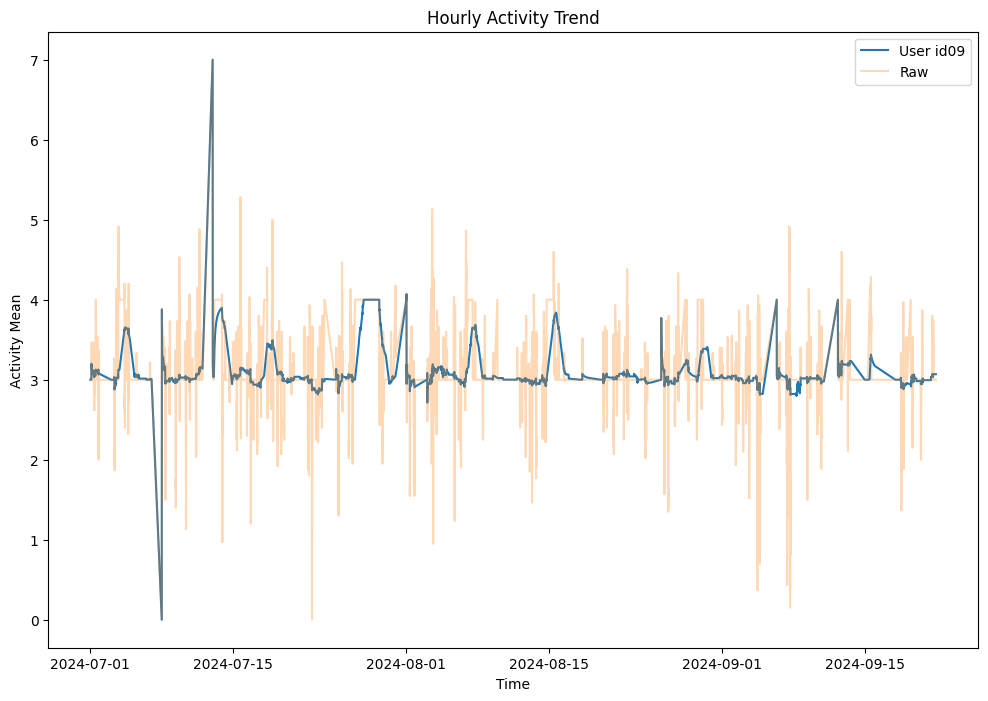

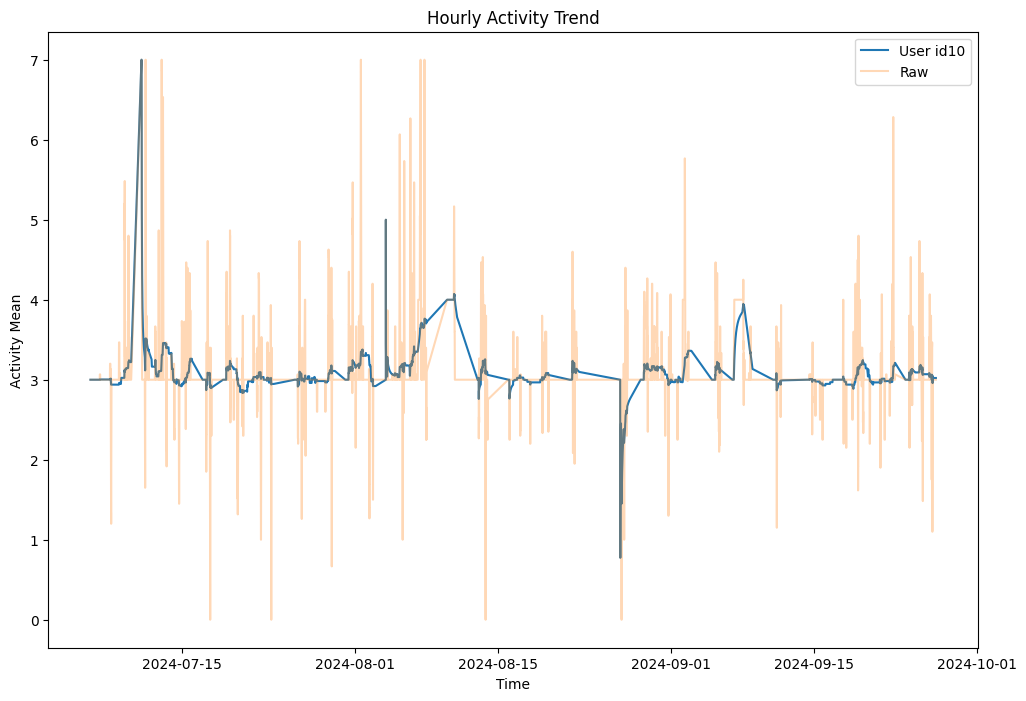

In [ ]:
for sid, group in Activity.groupby("subject_id"):
    plt.figure(figsize = (12,8))
    plt.plot(group["timestamp"], group["m_activity_rolling_mean_1D"], label=f"User {sid}")
    plt.plot(group["timestamp"], group["m_activity_rolling_mean_1H"], alpha = 0.3, label = "Raw")
    plt.xlabel("Time")
    plt.ylabel("Activity Mean")
    plt.title("Hourly Activity Trend")
    plt.legend()
    plt.show()